<a href="https://colab.research.google.com/github/sookyannnn/SIEW-2022-Economic-Geography-in-East-Asia-and-Pacfic/blob/main/CH02_Economic_Inequality_(Spatially_Constrained_Hierarchical_Clustering).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# !!! code has issue, couldn't replicate same results !!!

# Install Packages

In [ ]:
pip install pysal # run this cell first and restart runtime then run all

  Using cached https://files.pythonhosted.org/packages/09/c6/d3e3abe5b4f4f16cf0dfc9240ab7ce10c2baa0e268989a4e3ec19e90c84e/urllib3-1.26.4-py2.py3-none-any.whl
ERROR: requests 2.23.0 has requirement urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you'll have urllib3 1.26.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.25.11
    Uninstalling urllib3-1.25.11:
      Successfully uninstalled urllib3-1.25.11


In [ ]:
pip install contextily

  Using cached https://files.pythonhosted.org/packages/56/aa/4ef5aa67a9a62505db124a5cb5262332d1d4153462eb8fd89c9fa41e5d92/urllib3-1.25.11-py2.py3-none-any.whl
ERROR: pysal 2.4.0 has requirement urllib3>=1.26, but you'll have urllib3 1.25.11 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.26.4
    Uninstalling urllib3-1.26.4:
      Successfully uninstalled urllib3-1.26.4


# Load Packages

In [ ]:
%matplotlib inline

import seaborn as sns
import pandas as pd
from pysal.lib import weights
import geopandas as gpd
import contextily as cx
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster

from esda.moran import Moran
import libpysal.weights.set_operations as Wsets
from libpysal.weights import Queen, KNN
import seaborn 
import pandas as pd
import geopandas as gpd
import numpy
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
from pysal.lib import weights

# Load Dataset

1.   Duplicate this Google Drive folder : https://drive.google.com/drive/folders/1C0lNnGSsCGdQ8kC-gGEBYt8L9UeAaNcv?usp=sharing
2.   Mount Google Drive to Google Collab

## Satellite Nightlight

In [ ]:
satellite = gpd.read_file("/content/drive/MyDrive/SIEW (2022) Economic Geography in East Asia and Pacfic/Dataset/satellite.gpkg") 

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [ ]:
# Inspect the structure of the table
satellite.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 13825 entries, 0 to 13824
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          13825 non-null  int64   
 1   region      13799 non-null  object  
 2   country     13825 non-null  object  
 3   name        13825 non-null  object  
 4   econ_2005   13825 non-null  float64 
 5   econ_2018   13825 non-null  float64 
 6   popdens_05  13469 non-null  float64 
 7   popdens_18  13469 non-null  float64 
 8   X           13825 non-null  float64 
 9   Y           13825 non-null  float64 
 10  geometry    13825 non-null  geometry
 11  ward12      13825 non-null  int64   
 12  ward5       13825 non-null  int64   
 13  ward5wq     13825 non-null  int64   
 14  ward13      13825 non-null  int64   
 15  sagg13cls   13825 non-null  int64   
dtypes: float64(6), geometry(1), int64(6), object(3)
memory usage: 1.7+ MB


In [ ]:
# compute weight matrix (knn8)
w = weights.KNN.from_dataframe(satellite, k=8)
w

/usr/local/lib/python3.7/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 20 disconnected components.
  warnings.warn(message)


In [ ]:
# create subsets
econ05 = ['econ_2005']
econ18 = ['econ_2018']

# Spatially Constrained Hierarchical Clustering (2005,2018)

In [ ]:
numpy.random.seed(123456)
model = AgglomerativeClustering(linkage='ward',
                                            connectivity=w.sparse,
                                            n_clusters=12)
model.fit(satellite[econ05])

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:245: UserWarning: the number of connected components of the connectivity matrix is 20 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=<13825x13825 sparse matrix of type '<class 'numpy.float64'>'
	with 110600 stored elements in Compressed Sparse Row format>,
                        distance_threshold=None, linkage='ward', memory=None,
                        n_clusters=12)

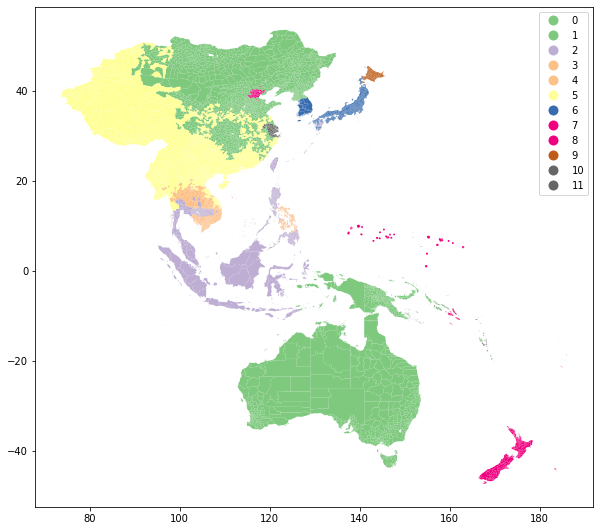

In [ ]:
#inspect output
satellite['ward12'] = model.labels_

# Setup figure and ax
f, ax = plt.subplots(1, figsize=(10, 10))

# Plot unique values choropleth including a legend and with no boundary lines
satellite.plot(column='econ_2005', categorical=True, legend=True, linewidth=0, ax=ax, cmap="Accent" )


# save
#plt.savefig("/content/drive/MyDrive/SIEW (2022) Economic Geography in East Asia and Pacfic/Figures/CH02-Hier_S_2005.png", dpi = 72)

In [ ]:
numpy.random.seed(123456)
model = AgglomerativeClustering(linkage='ward',
                                            connectivity=w.sparse,
                                            n_clusters=18)
model.fit(satellite[econ18])

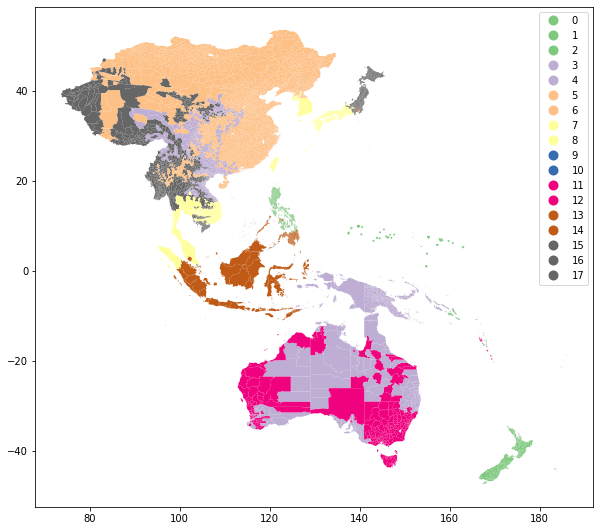

In [ ]:
# Plot

satellite['econ_2018'] =model.labels_

# Setup figure and ax
f, ax = plt.subplots(1, figsize=(10, 10))

# Plot unique values choropleth 
satellite.plot(column='econ_2018', categorical=True, legend=True, linewidth=0, ax=ax, cmap="Accent" )

# save
#plt.savefig("/content/drive/MyDrive/SIEW (2022) Economic Geography in East Asia and Pacfic/Figures/CH02-Hier_S_2018.png", dpi = 72)